In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

In [3]:
style.use('fivethirtyeight')

In [5]:
df = pd.read_csv("housingdata.csv",header = None)

In [6]:
df = pd.read_csv("housingdata.csv",header = None)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Column name info:
CRIM per capita crime rate by town

ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

DIS weighted distances to five Boston employment centres

RAD index of accessibility to radial highways

TAX full-value property-tax rate per $10,000

PTRATIO pupil-teacher ratio by town

B [1000*(Bk - 0.63) ^ 2] where Bk is the proportion of blacks by town

LSTAT percentage lower status of the population

MEDV Median value of owner-occupied homes in $1000s

In [8]:
housing_colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = housing_colnames
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
df.shape

(506, 14)

In [11]:
def plotFeatures(col_list,title):
    plt.figure(figsize=(10, 14))
    i = 0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(7,2,i)
        plt.plot(df[col],df["MEDV"],marker='.',linestyle='none')
        plt.title(title % (col))   
        plt.tight_layout()

13


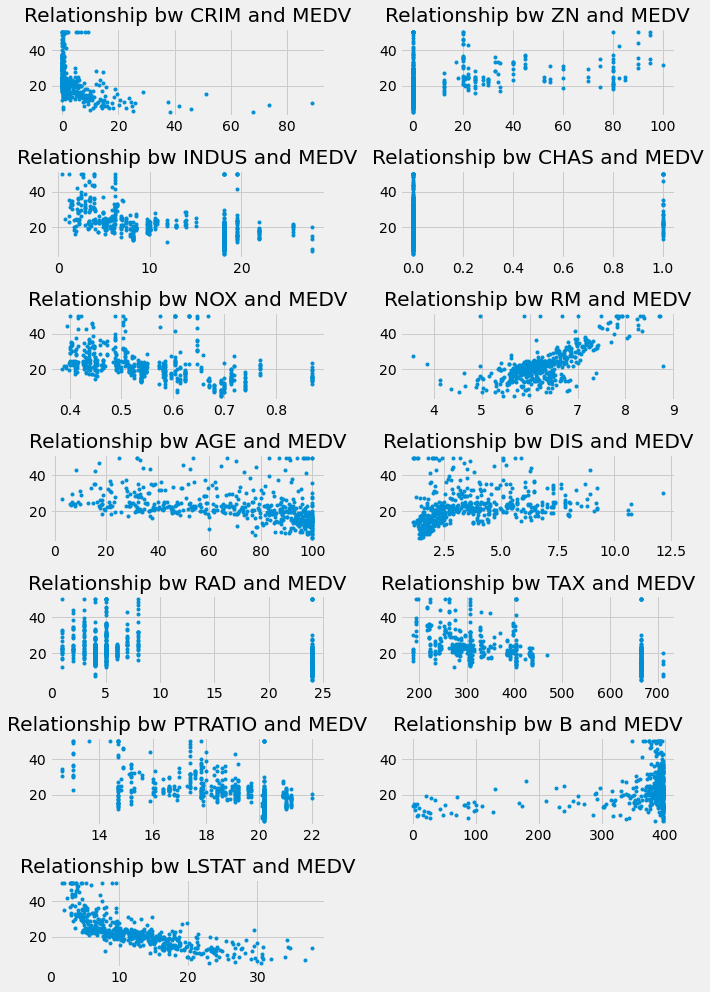

In [12]:
colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
plotFeatures(colnames,"Relationship bw %s and MEDV")

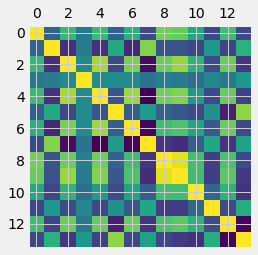

In [13]:
plt.matshow(df.corr())

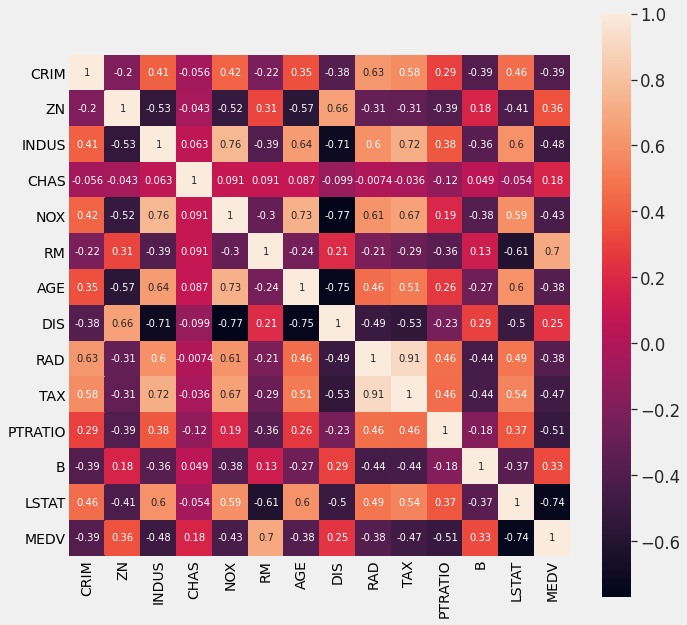

In [14]:
import seaborn as sns
fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

In [15]:
def predictPrice(x,theta):
    return np.dot(x,theta)

In [16]:

def calculateCost(x,theta,Y):
    prediction = predictPrice(x,theta)
    return ((prediction - Y)**2).mean()/2

In [17]:

def abline(x,theta,Y):
    """Plot a line from slope and intercept"""
    
    y_vals = predictPrice(x,theta)
    plt.xlim(0, 20)
    plt.ylim(-10, 60)
    plt.xlabel('No. of Rooms in the house')
    plt.ylabel('Price of house')
    plt.gca().set_aspect(0.1, adjustable='datalim')
    plt.plot(x,Y,'.',x, y_vals, '-')
    plt.show()

In [18]:
def gradientDescentLinearRegression(alpha=0.047,iter=5000):
    theta0 = []
    theta1 = []
    costs = []
    predictor = df["RM"]
    x = np.column_stack((np.ones(len(predictor)),predictor))
    Y = df["MEDV"]
    theta = np.zeros(2)
    for i in range(iter):
        pred = predictPrice(x,theta)
        t0 = theta[0] - alpha *(pred - Y).mean()
        t1 = theta[1] - alpha *((pred - Y)* x[:,1]).mean()
        
        theta = np.array([t0,t1])
        J = calculateCost(x,theta,Y)
        theta0.append(t0)
        theta1.append(t1)
        costs.append(J)
        if i%1000==0:
            print(f"Iteration: {i+1},Cost = {J},theta = {theta}")
            abline(x,theta,Y)
    print(f'theta0 = {len(theta0)}\ntheta1 = {len(theta1)}\nCosts = {len(costs)}')

Iteration: 1,Cost = 258.0310838585916,theta = [1.0590419  6.86646571]


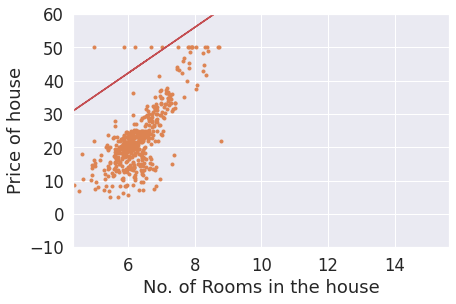

Iteration: 1001,Cost = 24.266176819466,theta = [-14.66352286   5.95689176]


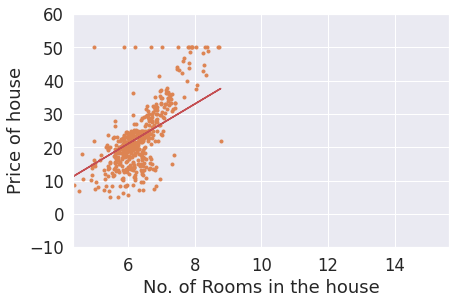

Iteration: 2001,Cost = 22.596414573659313,theta = [-23.30244842   7.31497465]


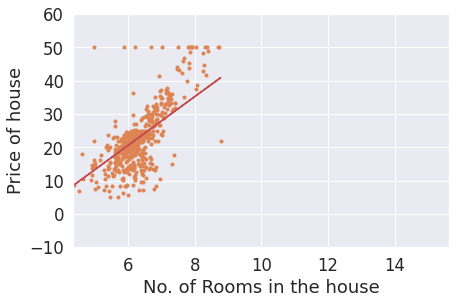

Iteration: 3001,Cost = 22.057316548467956,theta = [-28.21114608   8.08664681]


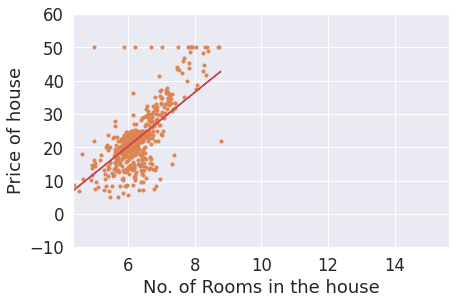

Iteration: 4001,Cost = 21.8832638164128,theta = [-31.00030227   8.52511631]


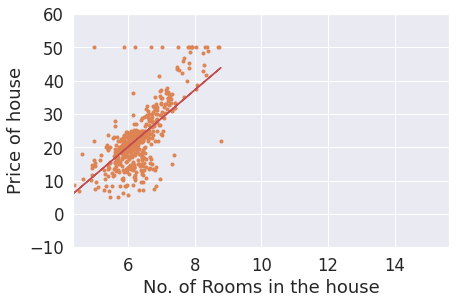

theta0 = 5000
theta1 = 5000
Costs = 5000


In [19]:
gradientDescentLinearRegression()